In [1]:
from cgi import test
import re
import os
import glob
import random
from nltk.corpus import stopwords
import nltk
import string
from pprint import pprint
from utils import *
from collections import Counter
import math
from run import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harrywanghc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
positrain, negatrain, voc = load_training_set(0.01,0.01)

In [3]:
posinum = len(positrain)
neganum = len(negatrain)
suminstance = neganum+posinum
print(len(negatrain))
print(len(positrain))
print(len(voc))

147
148
9242


In [4]:
sum([len(i) for i in positrain])

18072

In [5]:
countdict =  [dict(Counter(i)) for i in positrain]
testinstance = countdict[11]

In [6]:
def train(positivedata, negativedata):
    posidict = dict(Counter(sum(positivedata,[])))
    print(len(sum(positivedata,[])))
    print(len(sum(negativedata,[])))
    negadict = dict(Counter(sum(negativedata,[])))  
    return posidict, negadict

posidict, negadict = train(positrain, negatrain)

18072
18647


In [7]:

def probilityof(positivetrain, negativetrain, positivedict, negativedict, category: string, instance, log: bool, laplacesmooth: bool, smoothconstant = 1):

    posinum = len(positivetrain)
    neganum = len(negativetrain)
    suminstance = neganum+posinum   

    if category == "posi" or category == "positive":
        num = posinum
        trainset = positivetrain
        dictuse = positivedict
    else:
        num = neganum
        trainset = negativetrain
        dictuse = negativedict

    plist = []
    p0 = num/suminstance
    plist.append(p0)
    denominator = sum([len(i) for i in trainset])
    # print(sum(dictuse.values())-denominator)
    vsize = len(positivedict)+len(negativedict)

    for i in instance:
        if (not laplacesmooth):
            if i in dictuse:
                probinstance = (dictuse[i]/denominator)
            else: 
                continue
        else: # Smooth
            if i in dictuse:
                probinstance = ((dictuse[i]+smoothconstant)/(denominator+smoothconstant*vsize))
            else: 
                probinstance = ((smoothconstant)/(smoothconstant*vsize))
        plist.append(probinstance)

    if log:
        loglist = list(map(math.log10, plist))
        return sum(loglist)
    
    # if 0 not in plist:
    #     print("prob is not zero")

    return math.prod(plist)

In [8]:
pposi = probilityof(positrain,negatrain,posidict,negadict,'posi',testinstance,True,False)
pnega = probilityof(positrain,negatrain,posidict,negadict,'nega',testinstance,True,False)

print(pposi)
print(pnega)

-1397.4736853307088
-928.6067280510402


In [9]:
tp, tn, fp, fn = naive_bayes(0.2,0.2,0.2,0.2,laplacesmooth=False,logbool=False)

Loading Data, at time 0.00 sec
Learning Training Data, at time  4.88 sec
Testing Positive, at time  7.09 sec
Testing Negative, at time  7.50 sec
Total Time Cost is  7.87 sec
Accuarcy  is:  0.386946
Precision is:  0.387489
Recall    is:  0.357229
F-Score   is:  0.371744


In [10]:
dat = np.array(([tp, tn], [fp, fn]))
dat

array([[ 892, 1011],
       [1410, 1605]])

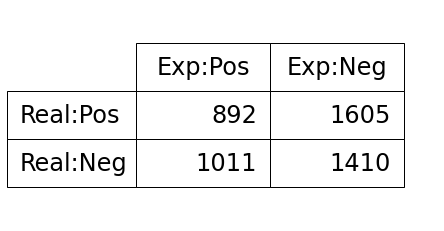

In [11]:
confusionmatrix(tp,tn,fp,fn)

In [12]:
a = {'a':10,'b':15,'c':20}
b = {'c':10,'b':15,'e':20}
